In [2]:
import pandas as pd

In [3]:
# Используем id в качестве индекса
df = pd.read_csv(r"candy-data.csv",
                  sep=',', decimal='.', index_col='competitorname')
df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [4]:
# Обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = df.drop(['Mike & Ike','Root Beer Barrels','Starburst'])
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,1
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1


In [4]:
# Отбор данных для предикторов, удаление двух последних столбцов, индекс не включается в данные автоматически.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [5]:
# Отбор столбца для отклика
y_true = pd.DataFrame(train_data['Y'])

In [6]:
# Обучение модели логистической регрессии
# Подключаем модель логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [7]:
# Обучение модели
regressor = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y_true.values.ravel())

In [8]:
# Чтение тестовых данных и отбор предикторов
test_data = pd.read_csv("candy-test.csv", sep=',', decimal='.', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

In [15]:
test_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
competitorname,,,,,,,,,,,,
Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700,0
Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500,0
Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600,0
Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500,1
Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540,1
Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100,0
Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100,0
Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500,1
Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500,0


In [9]:
# Предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = regressor.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
# Вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно (Левый столбик 0, правый 1)
Y_pred_probs = regressor.predict_proba(X_test)
Y_pred_probs

array([[0.71594192, 0.28405808],
       [0.63528759, 0.36471241],
       [0.68384254, 0.31615746],
       [0.62250565, 0.37749435],
       [0.23045546, 0.76954454],
       [0.32030031, 0.67969969],
       [0.34503045, 0.65496955],
       [0.21929811, 0.78070189],
       [0.66761086, 0.33238914],
       [0.59013561, 0.40986439],
       [0.67357349, 0.32642651],
       [0.86494578, 0.13505422],
       [0.66861619, 0.33138381],
       [0.44772981, 0.55227019],
       [0.2418998 , 0.7581002 ]])

In [11]:
# Отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]
Y_pred_probs_class_1

array([0.28405808, 0.36471241, 0.31615746, 0.37749435, 0.76954454,
       0.67969969, 0.65496955, 0.78070189, 0.33238914, 0.40986439,
       0.32642651, 0.13505422, 0.33138381, 0.55227019, 0.7581002 ])

In [18]:
test_data.index

Index(['Sugar Babies', 'Sugar Daddy', 'Super Bubble', 'Swedish Fish',
       'Tootsie Pop', 'Tootsie Roll Juniors', 'Tootsie Roll Midgies',
       'Tootsie Roll Snack Bars', 'Trolli Sour Bites', 'Twix', 'Twizzlers',
       'Warheads', 'Welchs Fruit Snacks', 'Werthers Original Caramel',
       'Whoppers'],
      dtype='object', name='competitorname')

In [21]:
# Вероятность отнесения конфеты Werthers Original Caramel к классу 1:
loc_WOC = test_data.index.get_loc("Werthers Original Caramel") # Узнаём номер индекса
Y_pred_probs_class_1 = Y_pred_probs[:, 1][loc_WOC]
Y_pred_probs_class_1

0.5522701933273573

In [22]:
# Вероятность отнесения конфеты Super Bubble к классу 1:
loc_WOC = test_data.index.get_loc("Super Bubble") # Узнаём номер индекса
Y_pred_probs_class_1 = Y_pred_probs[:, 1][loc_WOC]
Y_pred_probs_class_1

0.3161574584336349

In [35]:
# Отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test_data['Y'].to_frame().T).values.ravel()
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [42]:
# Подключение библиотеки для вычисления метрик
from sklearn import metrics

In [43]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

In [44]:
# Вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.8799999999999999

In [39]:
# Вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [40]:
# Вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [45]:
# Подключим библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

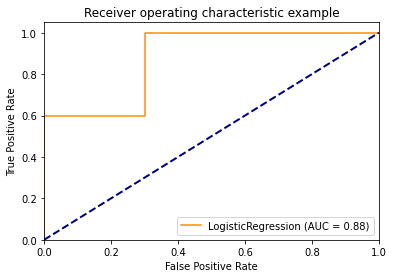

In [47]:
metrics.plot_roc_curve(regressor, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()